[View in Colaboratory](https://colab.research.google.com/github/emjames/visualization/blob/master/MatplotlibExamples.ipynb)

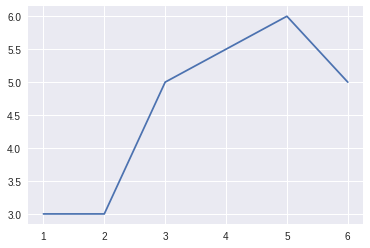

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 5, 6], [3,3,5,6,5], '-')
plt.show()

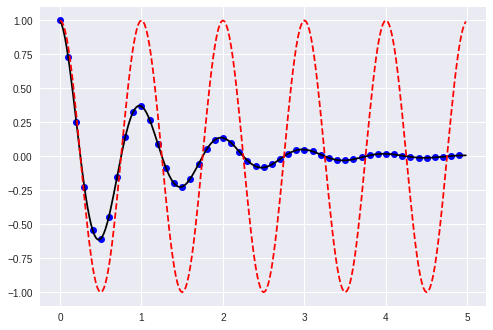

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
# plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

# plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

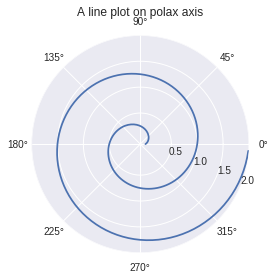

In [0]:
# Make a polar plot
import numpy as np
import matplotlib.pyplot as plt

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2]) # less radial ticks
ax.set_rlabel_position(-22.5) # radial labels away from the ploted line
ax.grid(True)
ax.set_title('A line plot on polax axis', va='bottom')
plt.show()

In [0]:
# polar plot
ri, ti = np.mgrid[0:2:100j, 0:2*np.pi:100j]
zi = rbf(ri*np.cos(ti), ri*np.sin(ti))

fig = plt.figure()
ax = plt.subplot(121, polar=True)
cax = ax.contour(ti, ri, zi, 10, linewidths=0.5, colors='k')
cax = ax.contourf(ti, ri, zi, 10, cmap=plt.cm.Spectral)
ax.set_rmax(2)

# rect plot
xi, yi = np.mgrid[-2:2:100j, -2:2:100j]
zi = rbf(xi, yi)

ax = plt.subplot(122, aspect='equal')
cax = ax.contour(xi, yi, zi, 10, linewidths=0.5, colors='k')
cax = ax.contourf(xi, yi, zi, 10, cmap=plt.cm.Spectral)
plt.show()

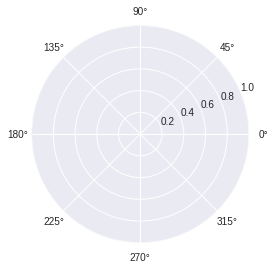

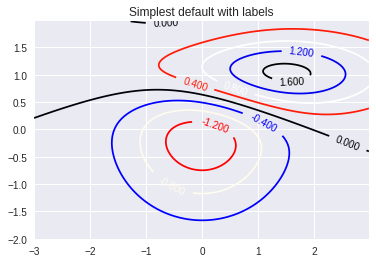

In [0]:
# Make a polar plot with contour
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig = plt.figure()
ax = plt.subplot(111, projection='polar')

delta = 0.025
x = np.arange(-3., 3., delta)
y = np.arange(-2., 2., delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10. * (Z2 - Z1)

# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')


plt.show()

In [0]:
"""
Illustrate simple contour plotting, contours on an image with
a colorbar for the contours, and labelled contours.

See also contour_image.py.
"""
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)


# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')


# contour labels can be placed manually by providing list of positions
# (in data coordinate). See ginput_manual_clabel.py for interactive
# placement.
plt.figure()
CS = plt.contour(X, Y, Z)
manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
plt.clabel(CS, inline=1, fontsize=10, manual=manual_locations)
plt.title('labels at selected locations')


# You can force all the contours to be the same color.
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours dashed')

# You can set negative contours to be solid instead of dashed:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours solid')


# And you can manually specify the colors of the contour
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 linewidths=np.arange(.5, 4, .5),
                 colors=('r', 'green', 'blue', (1, 1, 0), '#afeeee', '0.5')
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Crazy lines')


# Or you can use a colormap to specify the colors; the default
# colormap will be used for the contour lines
plt.figure()
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-3, 3, -2, 2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = plt.contour(Z, levels,
                 origin='lower',
                 linewidths=2,
                 extent=(-3, 3, -2, 2))

# Thicken the zero contour.
zc = CS.collections[6]
plt.setp(zc, linewidth=4)

plt.clabel(CS, levels[1::2],  # label every second level
           inline=1,
           fmt='%1.1f',
           fontsize=14)

# make a colorbar for the contour lines
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.title('Lines with colorbar')
#plt.hot()  # Now change the colormap for the contour lines and colorbar
plt.flag()

# We can still add a colorbar for the image, too.
CBI = plt.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])


plt.show()

# Line with scatter

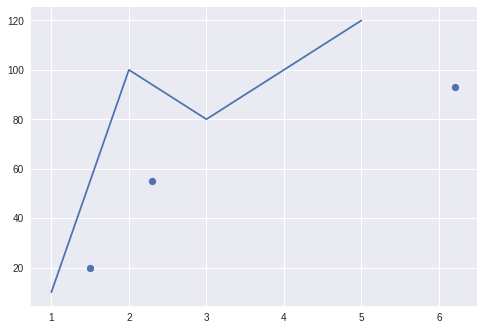

In [28]:
# fig= plt.figure()
# ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 5], [10, 100, 80, 120])
ax.scatter([1.5, 2.3, 6.2], [20, 55, 93])
plt.show()

# Multiple Axes

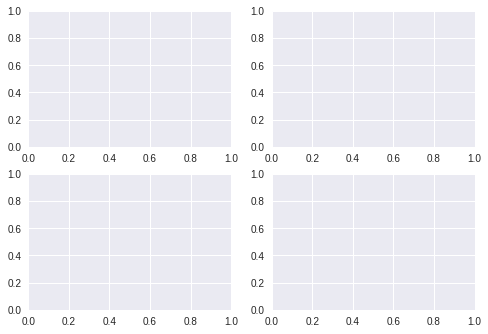

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.show()

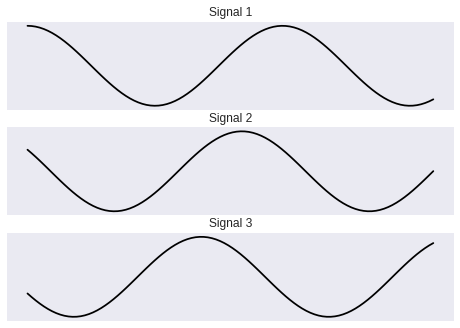

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Try to reproduce the figure shown in images/exercise_1-1.png

# Our data...
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

# Can you figure out what to do next to plot x vs y1, y2, and y3 on one figure?
# figure, ax = plt.subplots()
# ax.plot([:x], [y1, y2, y3])

fig, axes = plt.subplots(nrows=3)

for ax, y, name in zip(axes, [y1, y2, y3], names):
    ax.plot(x, y, color='black')
    ax.set(xticks=[], yticks=[], title=name)

plt.show()

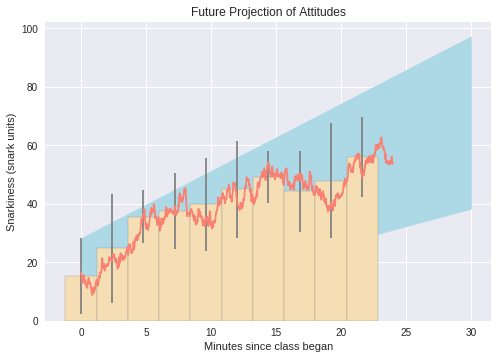

In [31]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

# Generate data...
y_raw = np.random.randn(1000).cumsum() + 15
x_raw = np.linspace(0, 24, y_raw.size)

# Get averages of every 100 samples...
x_pos = x_raw.reshape(-1, 100).min(axis=1)
y_avg = y_raw.reshape(-1, 100).mean(axis=1)
y_err = y_raw.reshape(-1, 100).ptp(axis=1)

bar_width = x_pos[1] - x_pos[0]

# Make a made up future prediction with a fake confidence
x_pred = np.linspace(0, 30)
y_max_pred = y_avg[0] + y_err[0] + 2.3 * x_pred
y_min_pred = y_avg[0] - y_err[0] + 1.2 * x_pred

# Just so you don't have to guess at the colors...
barcolor, linecolor, fillcolor = 'wheat', 'salmon', 'lightblue'

# Now you're on your own!
fig, ax = plt.subplots()

ax.plot(x_raw, y_raw, color=linecolor)
ax.bar(x_pos, y_avg, width=bar_width, color=barcolor, yerr=y_err, 
       ecolor='gray', edgecolor='gray')
ax.fill_between(x_pred, y_min_pred, y_max_pred, color=fillcolor)

ax.set(title='Future Projection of Attitudes', 
       ylabel='Snarkiness (snark units)', 
       xlabel='Minutes since class began')

plt.show()

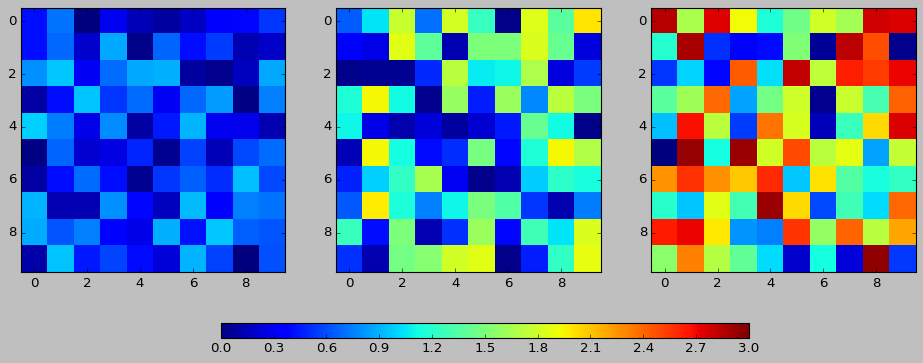

In [32]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

plt.style.use('classic')

# Generate random data with different ranges...
data1 = np.random.random((10, 10))
data2 = 2 * np.random.random((10, 10))
data3 = 3 * np.random.random((10, 10))

# Set up our figure and axes...
fig, axes = plt.subplots(ncols=3, figsize=plt.figaspect(0.5))
fig.tight_layout() # Make the subplots fill up the figure a bit more...
cax = fig.add_axes([0.25, 0.1, 0.55, 0.03]) # Add an axes for the colorbar

# Now you're on your own!
for ax, data in zip(axes, [data1, data2, data3]):
    im = ax.imshow(data, vmin=0, vmax=3, interpolation='nearest')

fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show()

# Contours

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


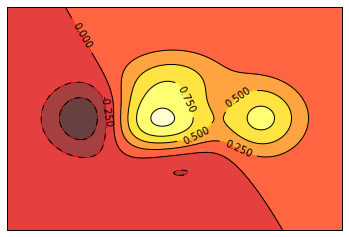

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x, y):
  # The height function
  return (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, f(X, Y), 8, alpha=0.75, cmap=plt.cm.hot)

C = plt.contour(X, Y, f(X, Y), 8, colors='black')
# add label
plt.clabel(C, inline=True, fontsize=10)

plt.xticks(())
plt.yticks(())
plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x, y):
  # The height function
  return (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, f(X, Y), 8, alpha=0.75, cmap=plt.cm.hot)

C = plt.contour(X, Y, f(X, Y), 8, colors='black')
# add label
plt.clabel(C, inline=True, fontsize=10)

plt.xticks(())
plt.yticks(())
plt.show()

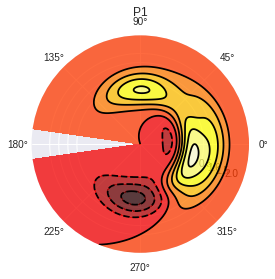

In [23]:
"""
Demo of a line plot on a polar axis.
"""
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x, y):
  # The height function
  return (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)


r = np.arange(0, 2, 0.2)
theta = 2 * np.pi * r

ax = plt.subplot(111, projection='polar')
# ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)


# contour
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, f(X, Y), 8, alpha=0.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X, Y), 8, colors='black')

ax.set_title("P1", va='bottom')
plt.show()


In [26]:
Zt = f(X, Y)
print(Zt.shape)

(256, 256)


# Polar contour plots


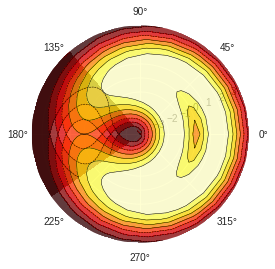

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

def f(x, y):
  # The height function
  return (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)

# ax = plt.subplot(111, projection='polar')
# Create polar axes
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
# Plot a contour plot on them
# theta, r, values are 2d array
#   containing the angles, radii and values respectively 
theta = np.arange(-4, 4, 0.25)
radii = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(theta, radii)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
contourAx = ax.contourf(X, Y, Z, 8, alpha=0.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, Z, 8, colors='black', linewidths=0.5)




In [55]:
print(theta.shape)
print(radii.shape)
print(R.shape)
print(Z.shape)


(32,)
(32,)
(32, 32)
(32, 32)


In [0]:
f(X, Y)